# Simple Linear Regression. Minimal Example

## Import Relevant Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generate random input data to train on

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(low=-10, high=10, size=(observations, 1))

In [3]:
inputs = np.column_stack((xs,zs))

In [4]:
inputs

array([[-9.45321364,  0.25034529],
       [ 1.37869533,  7.82060525],
       [ 9.77472543, -7.85167629],
       ...,
       [ 5.8533951 , -0.3866086 ],
       [ 8.43574384,  8.32763251],
       [ 0.16788991,  3.70469972]])

In [5]:
print(inputs.shape)

(1000, 2)


In [6]:
type(inputs)

numpy.ndarray

## Create the targets we will aim at

In [7]:
noise = np.random.uniform(-1,1,(observations, 1))

targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)

(1000, 1)


## Plot the training data
The point is to see the strong trend that our model should learn to reproduce

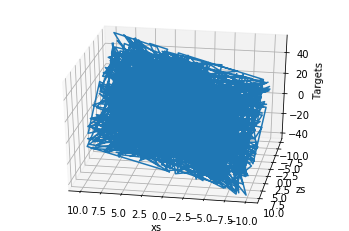

In [8]:
targets = targets.reshape(observations, )
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

## Initialize variables

In [9]:
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size=(2,1))

biases = np.random.uniform(-init_range, init_range, size=1)

print(weights)
print(biases)

[[ 0.07796733]
 [-0.0287752 ]]
[-0.05224616]


## Set a learning rate

In [10]:
learning_rate = 0.02

## Train the model

In [15]:
for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2)/2 / observations
    
    print(loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

0.3937865657342065
0.38483330188401044
0.37623443289488456
0.3679759308414101
0.36004432306211986
0.35242667018062446
0.3451105449967143
0.338084012213018
0.33133560896413167
0.32485432611646015
0.3186295903082587
0.3126512467005839
0.30690954241100904
0.3013951106030747
0.29609895520552526
0.29101243623640444
0.2861272557080523
0.2814354440900352
0.27692934730789887
0.2726016142565534
0.2684451848079105
0.264453278293211
0.2606193824412544
0.2569372427544857
0.2534008523055999
0.25000444193803395
0.24674247085434148
0.24360961757711233
0.24060077126767881
0.23771102338845576
0.23493565969530403
0.23227015254686217
0.22971015351829244
0.22725148630739841
0.22489013992153586
0.22262226213420436
0.22044415320064703
0.21835225982220086
0.21634316934955938
0.2144136042154808
0.2125604165878692
0.21078058323449958
0.20907120059101045
0.2074294800241217
0.20585274328234485
0.20433841812676679
0.2028840341347807
0.20148721866991587
0.20014569301119314
0.19885726863568914
0.19761984364825208
0

## Print weights and biases and see if we have worked correctly

In [16]:
print(weights, biases)

[[ 2.00302565]
 [-2.99433481]] [4.9265873]


##  Plot last outputs vs targets

Since they are last ones at the end of the training, they represent the final model accuracy.
The closer this plot is to a 45 degree lines, the closer target and output values are.

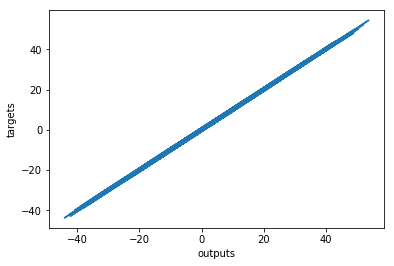

In [18]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()